In [1]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

import metapredict as meta

import pandas as pd

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from models import Canon, Isoform

In [2]:
engine = create_engine("sqlite:///C:\\Users\\ryanl\\OneDrive\\Repos\\predagg\\idpmodel\\finaldata\\test2.db", echo=False)

In [3]:
df = pd.read_sql_query(
    sql = sqlalchemy.select([Canon.id,
                     Canon.family_member,
                     Canon.precentdisordered]),
    con = engine
)


In [4]:
df

,id,family_member,precentdisordered
0,A0A075B6G3,A0A075B6G3_HUMAN,11.370
1,A0A087WV00,A0A087WV00_HUMAN,21.570
2,A0A087WZT3,A0A087WZT3_HUMAN,56.818
3,A0A087X1C5,CP2D7_HUMAN,5.049
4,A0A087X296,A0A087X296_HUMAN,8.167
...,...,...,...
80576,X6RLV5,X6RLV5_HUMAN,40.625
80577,X6RLX0,X6RLX0_HUMAN,20.089
80578,X6RLY7,X6RLY7_HUMAN,45.390
80579,X6RM00,X6RM00_HUMAN,21.721


In [5]:
id = []
isolistdisordered = []
with Session(engine) as session:
    isoformlistquery = session.query(Isoform).all()
    for isoform in isoformlistquery:
        id.append(isoform.canon_id)
        isolistdisordered.append(isoform.precentdisordered)
    id.append('O60260')
    isolistdisordered.append(79.69)
    isodf = pd.DataFrame({'id': id, 'isolistdisordered': isolistdisordered})

In [6]:
newdf = pd.merge(df, isodf, on="id")

In [7]:
newdf['difference'] = newdf['precentdisordered'] - newdf['isolistdisordered']

In [8]:
newdf

,id,family_member,precentdisordered,isolistdisordered,difference
0,A0A0K2S4Q6,CD3CH_HUMAN,31.343,19.608,11.735
1,A0A1B0GTW7,CIROP_HUMAN,15.482,16.438,-0.956
2,A0A1B0GTW7,CIROP_HUMAN,15.482,17.511,-2.029
3,A0AV02,S12A8_HUMAN,32.353,31.359,0.994
4,A0AV02,S12A8_HUMAN,32.353,51.845,-19.492
...,...,...,...,...,...
21987,Q9Y442,CV024_HUMAN,85.000,100.000,-15.000
21988,Q9Y6Z5,AFDDT_HUMAN,100.000,100.000,0.000
21989,Q5SVJ3,CA100_HUMAN,1.361,12.174,-10.813
21990,Q8N2B8,YB035_HUMAN,100.000,87.156,12.844


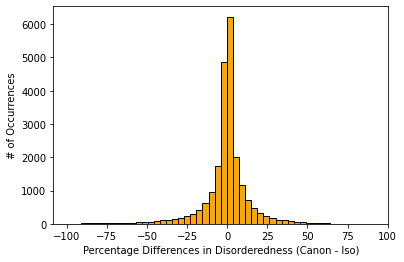

In [12]:
#using matplotlib
plt.xlabel('Percentage Differences in Disorderedness (Canon - Iso)')
plt.ylabel('# of Occurrences')
plt.hist(newdf['difference'], color='orange', edgecolor='black', bins=int(100/2))
plt.savefig('sampleplt.png')

array([[<AxesSubplot: title={'center': 'difference'}>]], dtype=object)

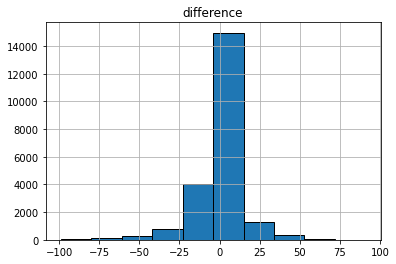

In [10]:
newdf.hist(column="difference", edgecolor='black')

In [11]:
newdf['difference'].describe()

count    21965.000000
mean        -0.648392
std         14.963262
min        -98.901000
25%         -3.702000
50%         -0.038000
75%          3.723000
max         90.819000
Name: difference, dtype: float64